<a href="https://colab.research.google.com/github/anisafitriani1122/Proyek-Kerja-Praktik/blob/main/KP_NSFC_PG_3_AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# mengimpor dataset
dataset = pd.read_excel('/content/sample_data/NSFC_PG3.xlsx')
dataset

,Section,Hectares Harv (Ha),Yield (Ton/Ha)
0,589B,9.24,58.430411
1,572C,12.73,58.832207
2,565F1,12.40,60.453710
3,531C1,4.21,60.757007
4,573B2,8.55,65.219181
...,...,...,...
189,522C,18.36,117.735730
190,514G1,4.33,117.927483
191,587C4,5.29,118.959357
192,546E2,5.11,120.542074


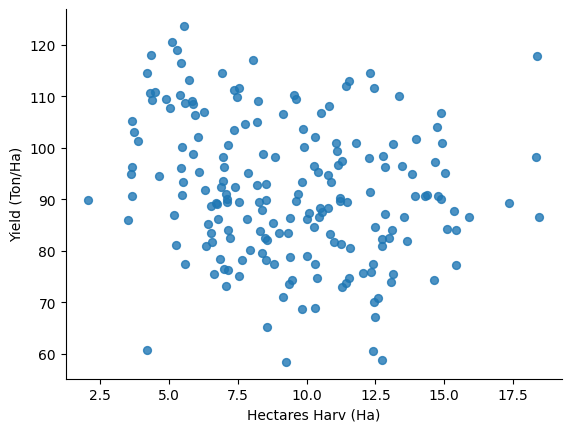

In [ ]:
# @title Hectares Harvest (Ha) vs Yield (Ton/Ha)

from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x='Hectares Harv (Ha)', y='Yield (Ton/Ha)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
X = dataset.iloc[:, [1,2]].values
print(dataset)
print(X)

    Section  Hectares Harv (Ha)  Yield (Ton/Ha)
0      589B                9.24       58.430411
1      572C               12.73       58.832207
2     565F1               12.40       60.453710
3     531C1                4.21       60.757007
4     573B2                8.55       65.219181
..      ...                 ...             ...
189    522C               18.36      117.735730
190   514G1                4.33      117.927483
191   587C4                5.29      118.959357
192   546E2                5.11      120.542074
193    546C                5.55      123.645405

[194 rows x 3 columns]
[[  9.24        58.43041126]
 [ 12.73        58.83220738]
 [ 12.4         60.45370968]
 [  4.21        60.75700713]
 [  8.55        65.21918129]
 [ 12.5         67.22712   ]
 [  9.85        68.75898477]
 [ 10.32        68.85552326]
 [ 12.46        69.9970305 ]
 [ 12.58        70.9027027 ]
 [  9.15        71.07224044]
 [ 11.27        72.89449867]
 [  7.06        73.14589235]
 [  9.35        73.6190

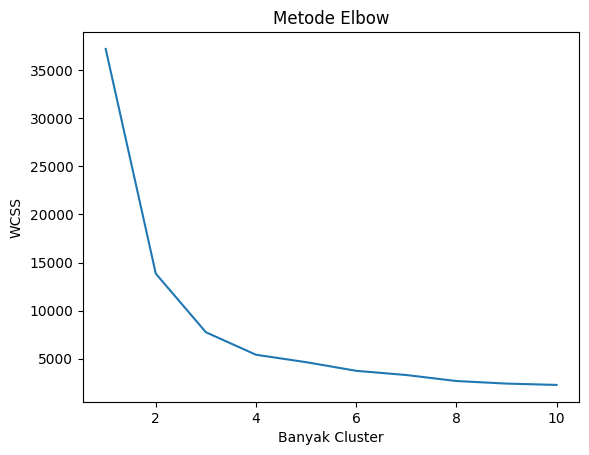

[37223.66686698439, 13846.50148839187, 7745.901170705297, 5404.4569640750415, 4632.192744389977, 3733.802104755096, 3294.691789859236, 2670.971304139135, 2403.8061815692863, 2265.398863843383]


In [ ]:
# menggunakan metode elbow untuk menentukan cluster yang tepat
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters = i, n_init = 'auto', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Banyak Cluster')
plt.ylabel('WCSS')
plt.show()
print(wcss)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.5141176719810578
For n_clusters = 3 The average silhouette_score is : 0.4664896460278898
For n_clusters = 4 The average silhouette_score is : 0.4257862184492577
For n_clusters = 5 The average silhouette_score is : 0.37160151746497544
For n_clusters = 6 The average silhouette_score is : 0.3421013618653807
For n_clusters = 7 The average silhouette_score is : 0.35281373069619687
For n_clusters = 8 The average silhouette_score is : 0.3611154262788441


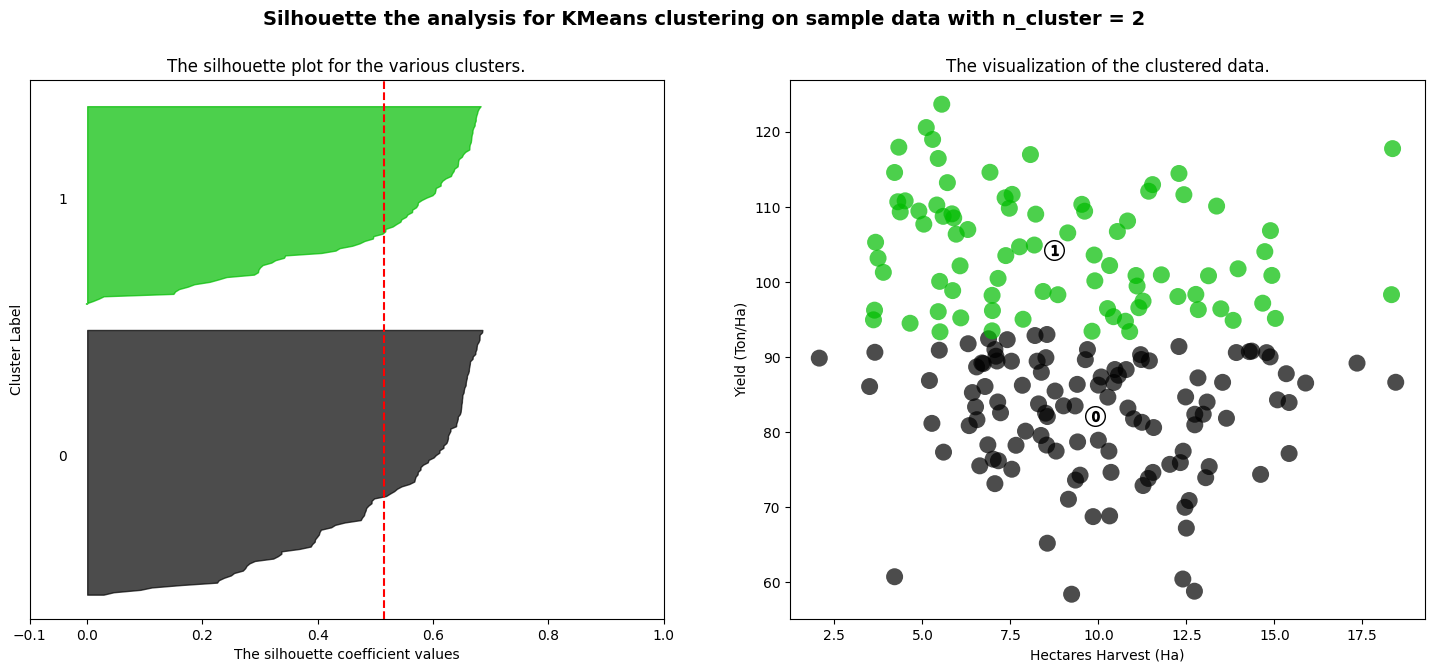

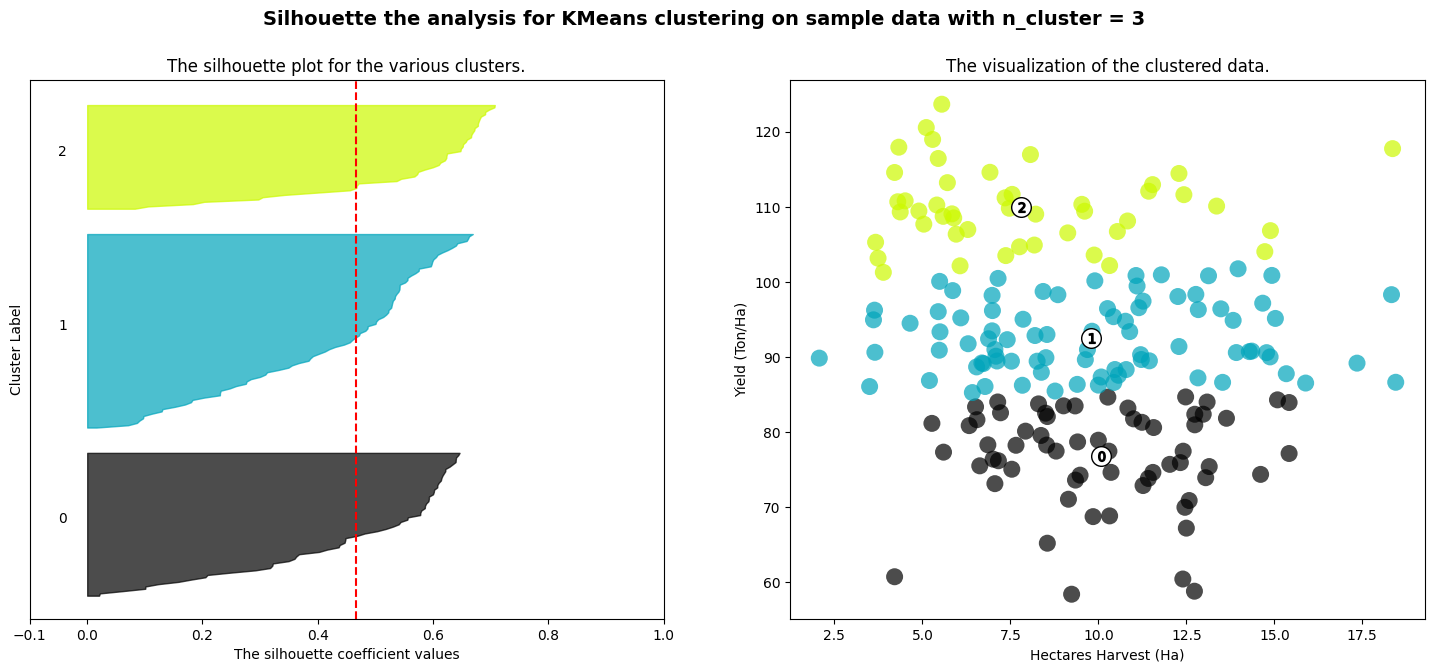

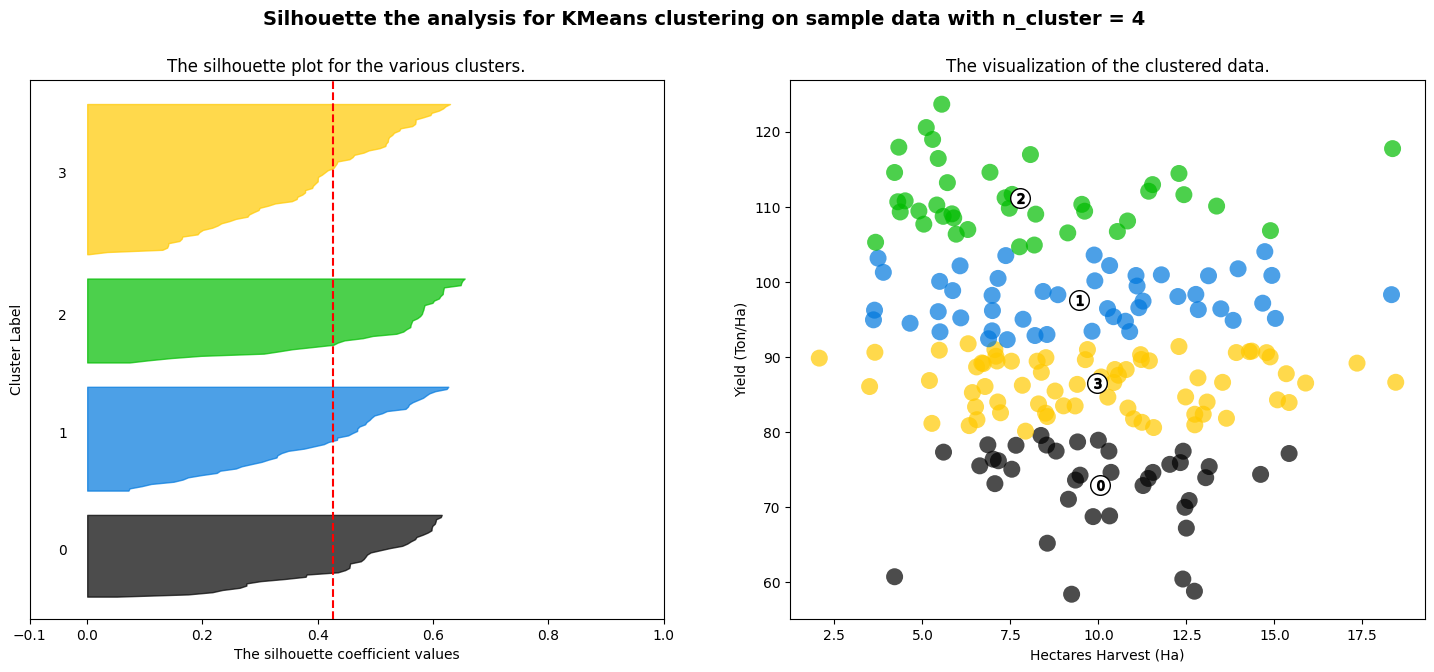

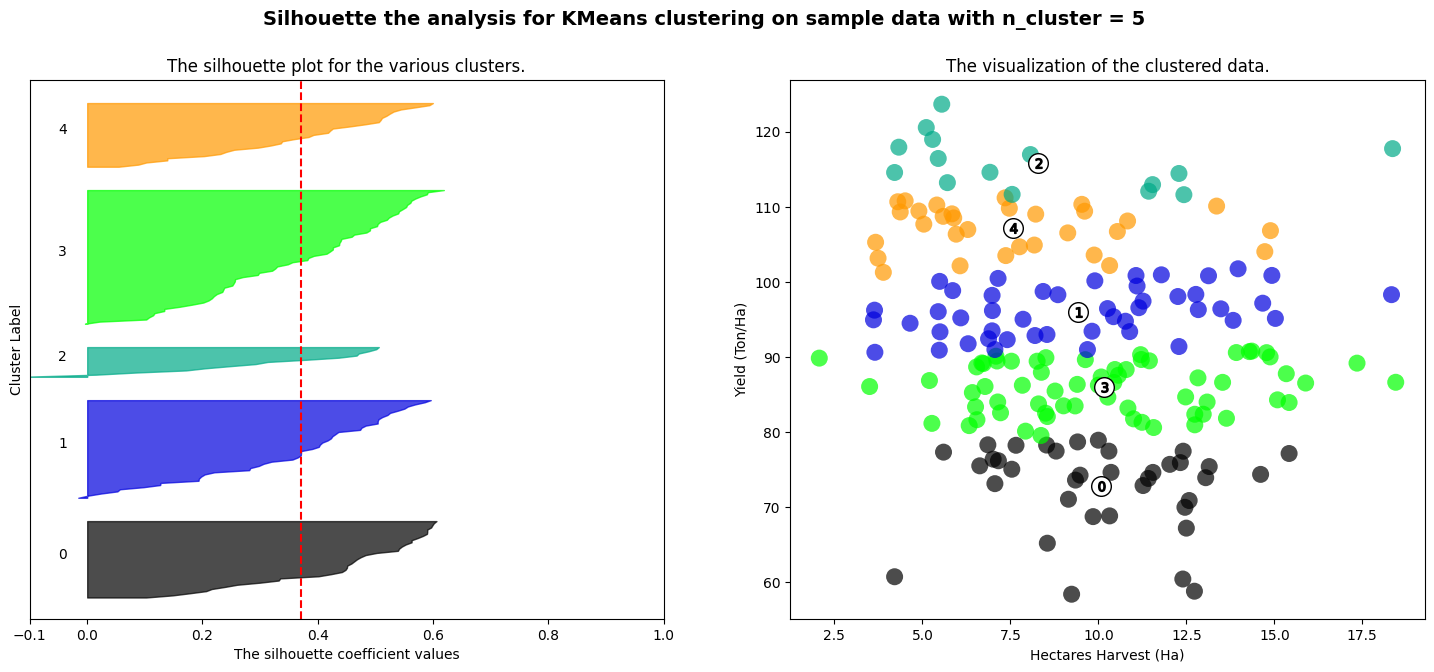

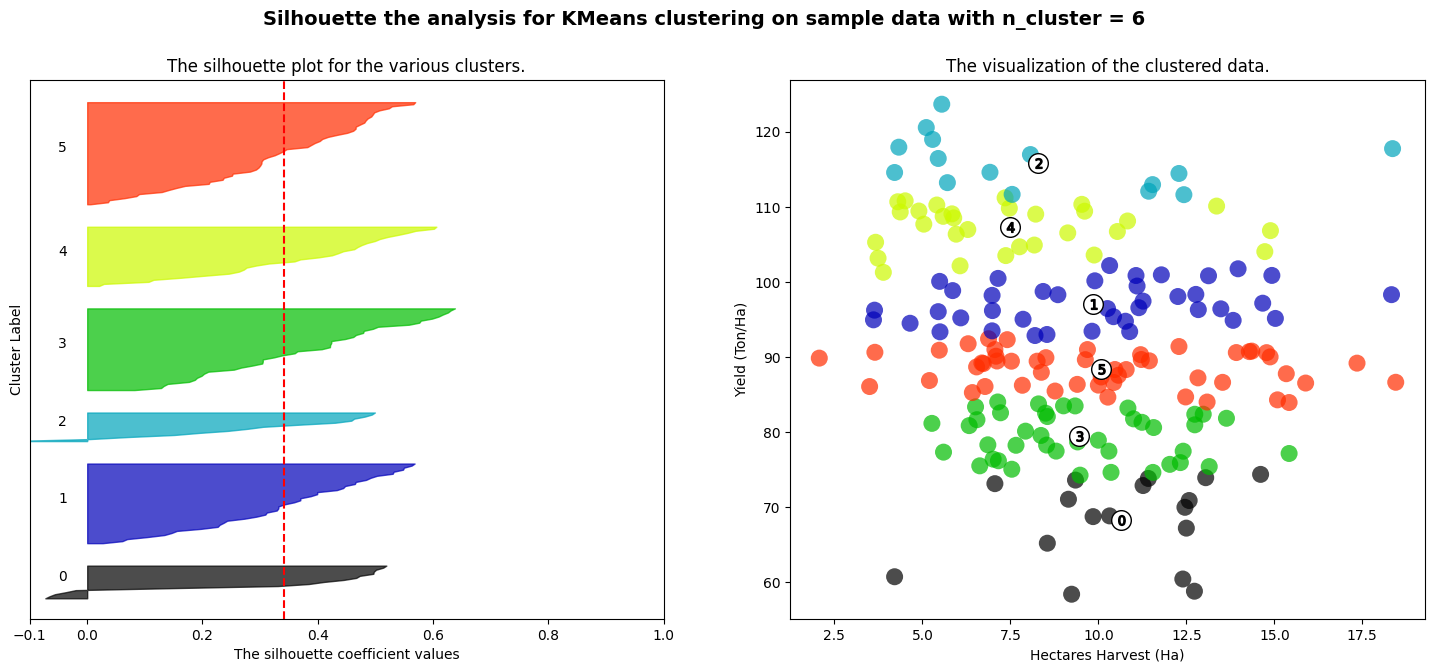

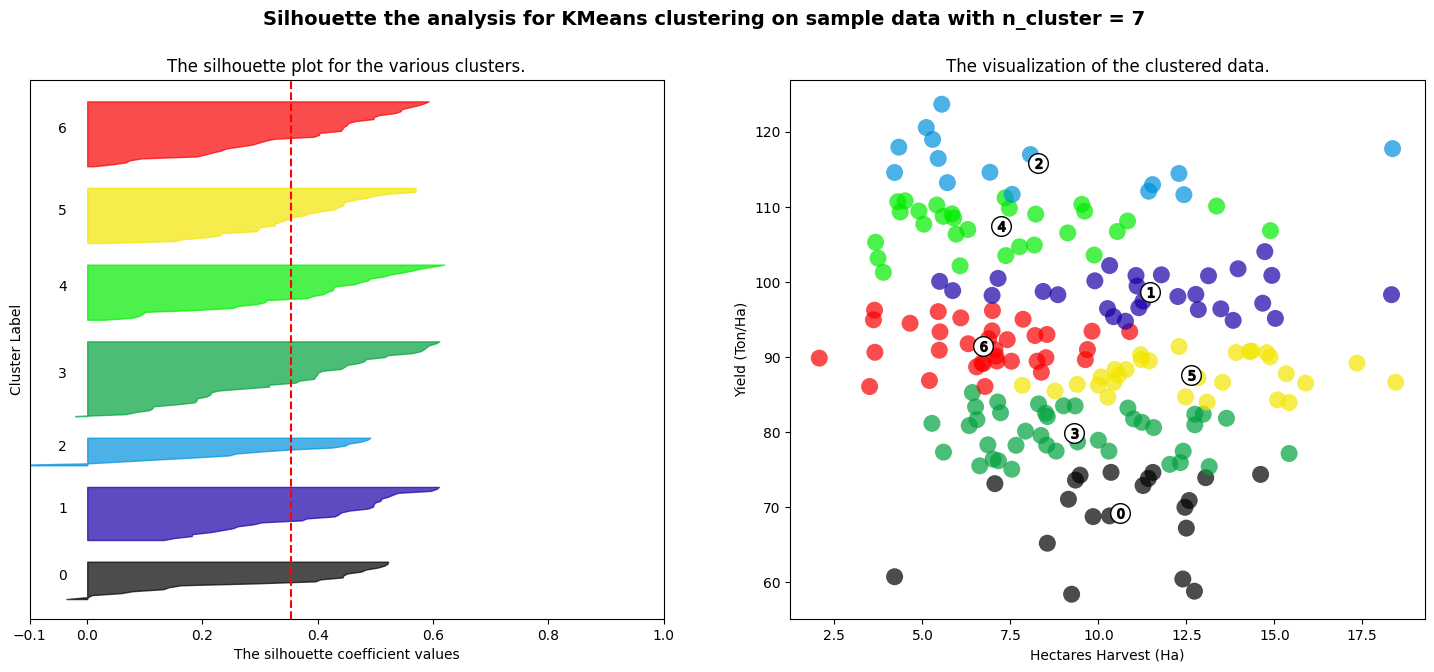

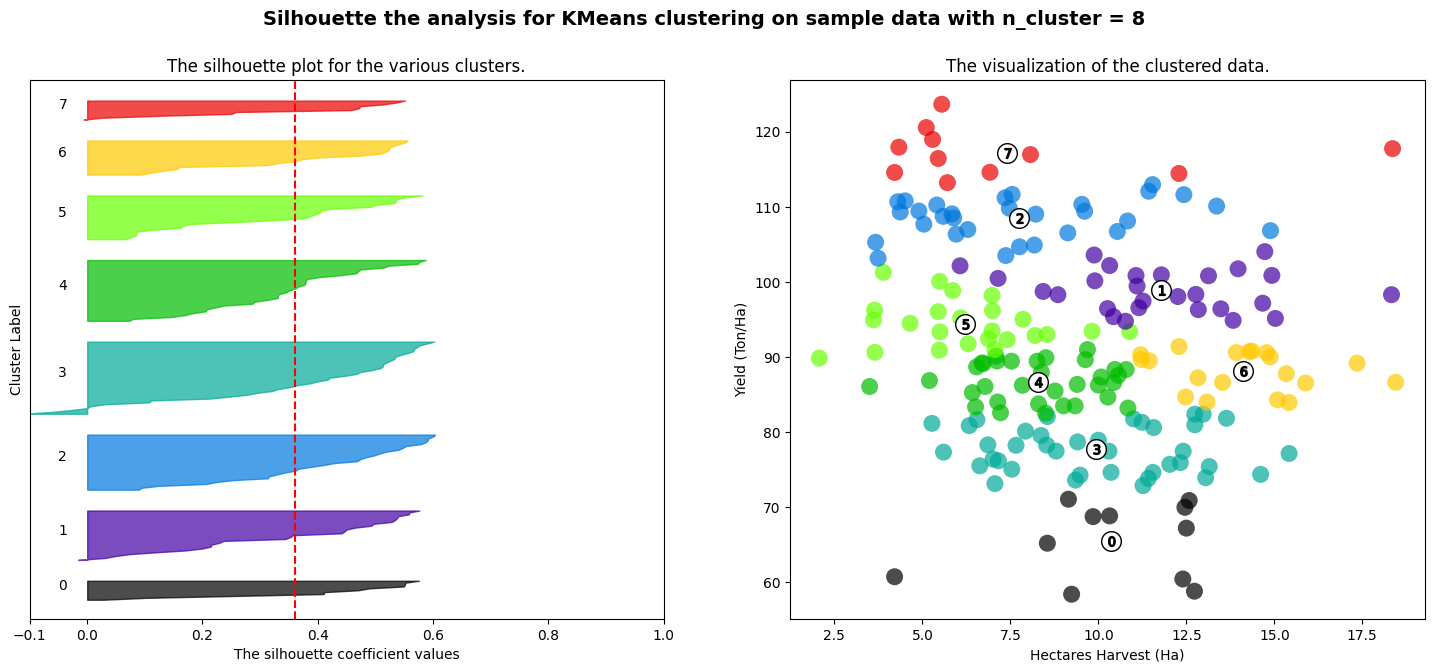

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    # create a subplot with 1 row and 2 columns
    fig,(ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # the 1st sub plot is the silhouette plot
    # the silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # the (n_clusters+1)*10 is for inserting space between silhouette
    # plot of individual clusters, to demarcate them clearly
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # the silhouette_score gives the average value for all the samples.
    # this gives a prespective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # compute the silhouette scores for each example
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7
        )

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # compute the new y_lower for the next plot
        y_lower = y_upper + 10 # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster Label")

    # the vertical line for average silhouette score of al the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) # clear the yaxis label / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd plot showing the actual clusters found
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker="o", s=150, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # labeling the cluster
    centers = clusterer.cluster_centers_
    # draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k"
    )

    for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Hectares Harvest (Ha)")
    ax2.set_ylabel("Yield (Ton/Ha)")

    plt.suptitle(
        "Silhouette the analysis for KMeans clustering on sample data with n_cluster = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()



In [ ]:
# menjalankan K-Means Clustering ke dataset
kmeans = KMeans(n_clusters = 2, n_init = 'auto', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

[[  9.84426087  82.4971292 ]
 [  8.77101266 104.81396865]]


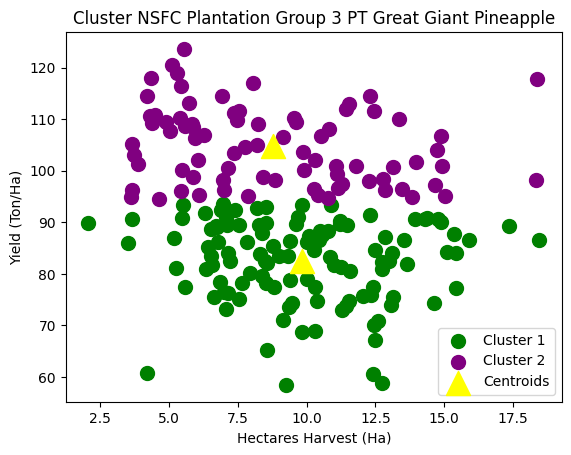

In [ ]:
# visualisasi hasil cluster
plt.scatter(X[y_kmeans ==  0 ,  0 ], X[y_kmeans ==  0 ,  1 ], s =  100 , c =  'hijau' , label =  'Cluster 1' )
plt.scatter(X[y_kmeans ==  1 ,  0 ], X[y_kmeans ==  1 ,  1 ], s =  100 , c =  'ungu' , label =  'Cluster 2' )

plt.scatter(kmeans.cluster_centers_[:,  0 ], kmeans.cluster_centers_[:,  1 ], marker= '^' , s =  300 , c= 'yellow' , label =  'Sentroid' )
print (kmeans.cluster_centers_)
plt.title( 'Klaster NSFC Plantation Group 3 PT Great Giant Pineapple ' )
plt.xlabel( 'Hektar Panen (Ha)' )
plt.ylabel( 'Hasil (Ton/Ha)' )
plt.legend()
plt.show()